# Task 8.01. Visualizations in Python

This task involves:
- Establishing a Python connection to MySQL Workbench to load previously created tables from the `transactions_db` database.
- Creating various visualizations based on variable types in the data.

In [1]:
# import libraries 
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from dotenv import load_dotenv

import mysql.connector
from mysql.connector import Error

warnings.filterwarnings("ignore")

In [2]:
# display settings
# font sizes
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14             
plt.rcParams['axes.labelsize'] = 14  

plt.rcParams['xtick.labelsize'] = 12      
plt.rcParams['ytick.labelsize'] = 12       
plt.rcParams['legend.fontsize'] = 12       
 
# use only 3 contrasting colours
sns.set_palette([sns.color_palette('cividis')[0], 
                 sns.color_palette('cividis')[3],
                 sns.color_palette('cividis')[5]])

sns.set_style("darkgrid")

## Downloading data
### Connection to MySQL DB and Data Extraction

#### Setting Up the `.env` File
Before running the project, you will need to create a `.env` file in the root of the project to provide your MySQL credentials. File should contain variables:
- `MYSQL_USER`: Your MySQL username.
- `MYSQL_PASSWORD`: Your MySQL password.
- `HOST`: The host where your MySQL server is running (usually `127.0.0.1` for localhost)

In [3]:
# database name and tables to download
DB = 'transactions_db'
TBLS = ['transactions', 'companies', 'users', 'products']

In [4]:
# load environment variables from .env
load_dotenv()

# configuration for MySQL connection
config = {
  'user': os.getenv('MYSQL_USER'),
  'password': os.getenv('MYSQL_PASSWORD'),
  'host': os.getenv('HOST'),
  'database': DB,
  'raise_on_warnings': True
}

In [5]:
# define function to connect to MySQL and download data
def get_data(table_names):

    """
    Input: string or list - table name(s) to fetch data from.
    Connects to MySQL and fetches data from the specified tables.
    Output: dict or pd.DataFrame 
    (dictionary of DataFrames if multiple tables are fetched, 
    otherwise a single DataFrame)
    """
    
    try:
        # establish connection
        cnx = mysql.connector.connect(**config)
        cursor = cnx.cursor(dictionary=True)

        data = {}
        for table in table_names:
            query = f"select * from {table}"
            cursor.execute(query)
            records = cursor.fetchall()
            print(f"Total rows in table {table}: {cursor.rowcount}")
            data[table] = pd.DataFrame(records)

        return data if len(table_names) > 1 else data[table_names[0]]

    except mysql.connector.Error as error:
        print(f"Failed to get record from MySQL table: {error}")

    finally:
        if cnx.is_connected():
            cursor.close()
            cnx.close()
            print("MySQL connection is closed")

In [6]:
# fetch data from MySQL and store in dictionary
data = get_data(TBLS)

Total rows in table transactions: 587
Total rows in table companies: 100
Total rows in table users: 275
Total rows in table products: 100
MySQL connection is closed


## Data Preprocessing and Feature Engineering

Since we have worked with this database before, we know that there are no missing values or duplicates. However, we can double-check this.

In [7]:
# define function to display information about the data
def data_info(df):
   
    """Input: dataframe.
    Function displays basic information, 
    checks for duplicates and NaN. 
    """
    
    # get first and last 5 rows
    display(df)
    
    # get information about the data
    print()
    print(df.info())
    
    # number of unique values for each column
    print()
    print('\033[1mNumber of unique values')
    display(df.nunique())
    
    # check for duplicates (without id columns)
    print()
    if df.iloc[:,1:].duplicated().sum() > 0:
        print('Data contain full duplicates\n')
    else:
        print('There are no full duplicates in the data\n')
    
    # check for NaN
    if df.isna().sum().sum() > 0:
        print('Data contain NaN\n')
    else:
        print('There are no NaNs in the data\n')

In [8]:
for tabel in TBLS:
    print(f'\033[1m{tabel.upper()}')
    print('_____________________')
    data_info(data[tabel])

TRANSACTIONS
_____________________


,id,credit_card_id,company_id,transaction_date,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980
...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                587 non-null    object        
 1   credit_card_id    587 non-null    object        
 2   company_id        587 non-null    object        
 3   transaction_date  587 non-null    datetime64[ns]
 4   amount            587 non-null    object        
 5   declined          587 non-null    int64         
 6   product_ids       587 non-null    object        
 7   user_id           587 non-null    int64         
 8   lat               587 non-null    float64       
 9   longitude         587 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 46.0+ KB
None

Number of unique values


id                  587
credit_card_id      275
company_id          100
transaction_date    587
amount              585
declined              2
product_ids         482
user_id             216
lat                 587
longitude           587
dtype: int64


There are no full duplicates in the data

There are no NaNs in the data

COMPANIES
_____________________


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site\r
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9\r
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars\r
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110\r
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings\r
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub\r
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars\r
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one\r
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site\r



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None

Number of unique values


company_id      100
company_name    100
phone           100
email           100
country          15
website          72
dtype: int64


There are no full duplicates in the data

There are no NaNs in the data

USERS
_____________________


,user_id,user_name,user_surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,2,Garrett,Mcconnell,(718) 257-2412,integer.vitae.nibh@protonmail.org,"Aug 23, 1992",United States,Des Moines,59464,903 Sit Ave
2,3,Ciaran,Harrison,(522) 598-1365,interdum.feugiat@aol.org,"Apr 29, 1998",United States,Columbus,56518,736-2063 Tellus St.
3,4,Howard,Stafford,1-411-740-3269,ornare.egestas@icloud.edu,"Feb 18, 1989",United States,Kailua,77417,Ap #545-2244 Erat. Rd.
4,5,Hayfa,Pierce,1-554-541-2077,et.malesuada.fames@hotmail.org,"Sep 26, 1998",United States,Sandy,31564,341-2821 Ultrices Av.
...,...,...,...,...,...,...,...,...,...,...
270,271,Leandra,Cherry,089-285-7016,lobortis.quis@hotmail.ca,"Sep 2, 1991",Canada,Gander,H6S 6M9,554-9293 Sollicitudin Av.
271,272,Hedwig,Gilbert,064-204-8788,sem.eget@icloud.edu,"Apr 16, 1991",Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road"
272,273,Hilary,Ferguson,060-710-1604,sapien.molestie.orci@google.edu,"Nov 3, 1981",Canada,Pangnirtung,12T 5G4,Ap #736-4628 Cras St.
273,274,Jameson,Hunt,024-732-2321,fringilla@protonmail.com,"Jan 29, 1982",Canada,Township of Minden Hills,B6V 6N4,224-4927 Praesent Ave



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       275 non-null    int64 
 1   user_name     275 non-null    object
 2   user_surname  275 non-null    object
 3   phone         275 non-null    object
 4   email         275 non-null    object
 5   birth_date    275 non-null    object
 6   country       275 non-null    object
 7   city          275 non-null    object
 8   postal_code   275 non-null    object
 9   address       275 non-null    object
dtypes: int64(1), object(9)
memory usage: 21.6+ KB
None

Number of unique values


user_id         275
user_name       248
user_surname    244
phone           272
email           274
birth_date      273
country           3
city            212
postal_code     275
address         275
dtype: int64


There are no full duplicates in the data

There are no NaNs in the data

PRODUCTS
_____________________


,product_id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,2,Tarly Stark,$9.24,#919191,2.0,WH-3
2,3,duel tourney Lannister,$171.13,#d8d8d8,1.5,WH-2
3,4,warden south duel,$71.89,#111111,3.0,WH-1
4,5,skywalker ewok,$171.22,#dbdbdb,3.2,WH-0
...,...,...,...,...,...,...
95,96,dooku solo,$20.92,#282828,2.1,WH--91
96,97,jinn Winterfell,$65.25,#bababa,1.0,WH--92
97,98,Direwolf Littlefinger,$38.33,#bababa,2.0,WH--93
98,99,the duel,$151.78,#212121,1.5,WH--94



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    100 non-null    int64  
 1   product_name  100 non-null    object 
 2   price         100 non-null    object 
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None

Number of unique values


product_id      100
product_name     70
price           100
colour           64
weight           12
warehouse_id    100
dtype: int64


There are no full duplicates in the data

There are no NaNs in the data



The data does not contain missing values, nor full duplicates (but there are equal emails and phones).

The format of the column with transaction amount (`transaction[amount]`) should be changed to a numeric one, transaction date (`transaction[transaction_date]`) and birth date of users (`users[birth_date]`) to datetime.

Let's merge dataframes `transactions`, `companies` and `users` for future use.

In [9]:
# merge dataframes
df = (
    data['transactions'][['id', 'company_id', 'transaction_date', 'amount', 'declined', 'product_ids', 'user_id']]
    .merge(data['companies'][['company_id', 'country']], how = 'left', on='company_id')
    .merge(data['users'][['user_id', 'birth_date', 'country']], how = 'left', on='user_id')
    .rename(columns={'country_x': 'company_country', 'country_y': 'user_country'})
)

### Converting columns to appropriate data types

Let's change date types.

In [10]:
# dates to "datetime"
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

# amount to "float"
df['amount'] = df['amount'].astype('float')

# products to list
df['product_ids'] = df['product_ids'].str.split(', ')

### Generating additional features for analysis

There is only one "true" numeric variable in our dataframe `amount`. Let's generate more variables to have wider options to plot.

In [11]:
# number of products per transaction
df['num_products'] = df['product_ids'].str.len()

# PER USER
# user age
df['user_age'] = ((pd.to_datetime('today') - df['birth_date']) / np.timedelta64(1, 'D') // 365).astype(int)
# user liftime - days between first and last transaction
df['user_lifetime'] = df.groupby('user_id')['transaction_date'].transform(lambda x: (x.max() - x.min()).days)
# number of declines per user
df['declines_per_user'] = df.groupby('user_id')['declined'].transform('sum')

# PER MONTH
# transaction month
df['transaction_month'] = df['transaction_date'].values.astype('datetime64[M]')
# amount per month
df['amount_per_month'] = df.groupby(df['transaction_month'])['amount'].transform('sum')
# sales per month 
df['sales_per_month'] = (df['amount']
    .where(df['declined']==0, 0)
    .groupby(df['transaction_month'])
    .transform('sum')
    )
# lost per month (amount of declined transactions)
df['lost_per_month'] = (df['amount']
    .where(df['declined']==1, 0)
    .groupby(df['transaction_month'])
    .transform('sum')
    )
# number of declines per month
df['declines_per_month'] = df.groupby('transaction_month')['declined'].transform('sum')

In [12]:
# check month calculations
print('Difference between total amount and sum of total amounts per month') 
print(int(sum(df['amount'])-sum(df.groupby('transaction_month')['amount_per_month'].first())))

print('Difference between total sales and sum of sales per month') 
print(int(sum(df.groupby('transaction_month')['sales_per_month'].first()) - sum(df.query('declined==0')['amount'])))

print('Difference between total lost and sum of lost per month') 
print(int(sum(df.groupby('transaction_month')['lost_per_month'].first()) - sum(df.query('declined==1')['amount'])))

Difference between total amount and sum of total amounts per month
0
Difference between total sales and sum of sales per month
0
Difference between total lost and sum of lost per month
0


### Save dataframe as .CSV file
Let's save created dataframe to a .csv file to use it in Sprint 8.2.

In [13]:
df.to_csv('transactions_companies_users.csv', index=False)

## Level 1
### Exercise 1. Visualization of a single numeric variable.

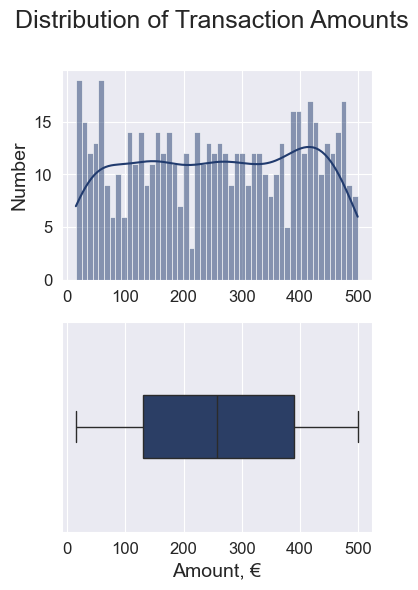

In [14]:
# visualizing the distribution of transaction amounts
fig, axs = plt.subplots(2, 1, figsize=(4, 6))
fig.suptitle("Distribution of Transaction Amounts")

# histogram
(sns.histplot(data=df['amount'], kde=True, ax=axs[0], bins=50)
    .set(xlabel=None, ylabel='Number')
)

# boxplot
(sns.boxplot(data=df['amount'], ax=axs[1], width=0.3, orient='h')
    .set(yticklabels=[], xlabel='Amount, €')
)
plt.show()

Transaction amount has roughly uniform distribution, with median around €250 and notable peaks for amounts under €100 (frequent but small purchases, possible single-item). To reach a higher desired median, strategies could include encouraging customers to buy more than one product per transaction, or revising pricing strategies, particularly if many products are priced low. Even with multiple items, the total amount may not reach the target of €250 unless higher-value items or bundles are introduced.

### Exercise 2. Visualization of two numerical variables.

Let's see how *sales* are distributed for different number of items (products) in transaction.

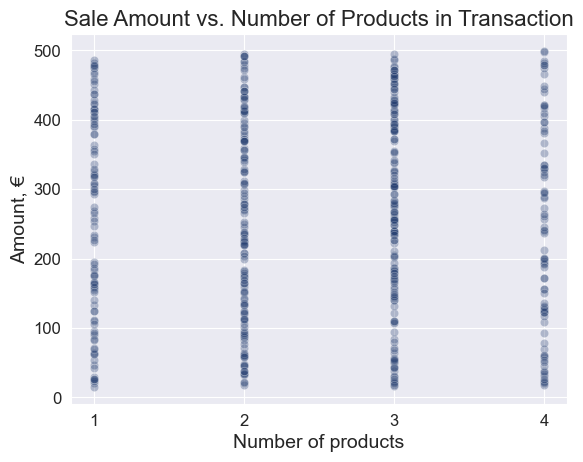

In [15]:
# scatterplot
sns.scatterplot(data=df.query('declined==0'), 
                x='num_products', 
                y='amount',
                alpha=0.3)

plt.title('Sale Amount vs. Number of Products in Transaction')
plt.xlabel('Number of products')
plt.gca().xaxis.get_major_locator().set_params(integer=True)
plt.ylabel('Amount, €')
plt.show()

The scatterplot shows no clear relationship between the number of products in a transaction and the sale amount (only succsessful transactions). Sales with a single product often exhibit high sale amounts, while those with multiple products can still have low amounts. This indicates that encouraging customers to buy more items may not significantly increase transaction values. Instead, revising the product mix and pricing strategies to focus on higher-value products could be a more effective approach to increasing sales revenue.

**Lost income dynamic**<br>
We can also examine lost income, represented by the monthly amount of declined transactions. However, it’s important to note that not all declined transactions should be considered as lost income — some customers may have initially encountered issues but later completed their purchases. These cases can be identified by analyzing the time between declined transactions and subsequent successful purchases.

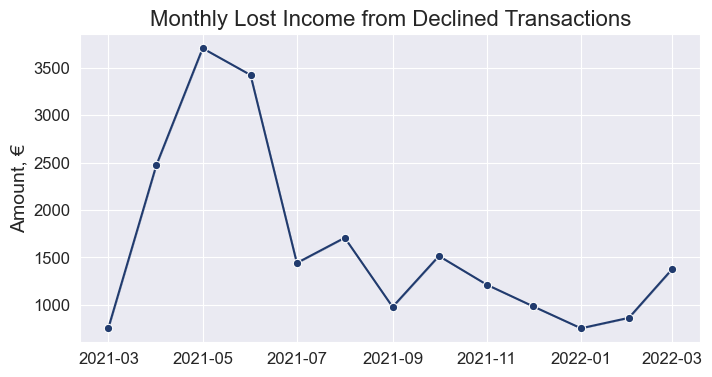

In [16]:
# lineplot
plt.figure(figsize=(8, 4))
sns.lineplot(data=df,
             x='transaction_month',
             y='lost_per_month',
             marker='o')

plt.title('Monthly Lost Income from Declined Transactions')
plt.xlabel(None)
plt.ylabel('Amount, €')
plt.show()

There are early signs that lost income may rise again during the same months in 2022. To mitigate potential losses, an urgent analysis of declined transactions should be conducted. This includes identifying the companies, users, and countries with high decline rates during critical periods. It’s also crucial to investigate if customers facing declines eventually complete their purchases later, distinguishing between genuine lost income and temporary transaction issues.

### Exercise 3. Visualization of a single categorical variable.
**Distribution of Sales by Country**

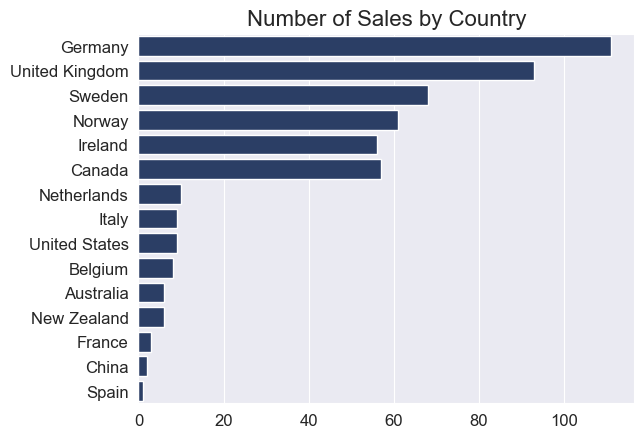

In [17]:
# barplot
sns.countplot(
    data=df.query('declined==0'), 
    y='company_country', 
    order = df['company_country'].value_counts().index
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of Sales by Country')
plt.show()

Certain countries, such as Germany in Europe and Canada in America, stand out with a significantly higher number of sales. This disparity suggests potential opportunities to analyze and learn from the strategies employed by companies in these high-performing countries. By adapting these practices, it may be possible to drive growth in sales for countries that currently underperform in their respective regions.

**Distribution of Transactions by User Origin**<br>
Let's also see how number of transactions distributed between users with different origin.

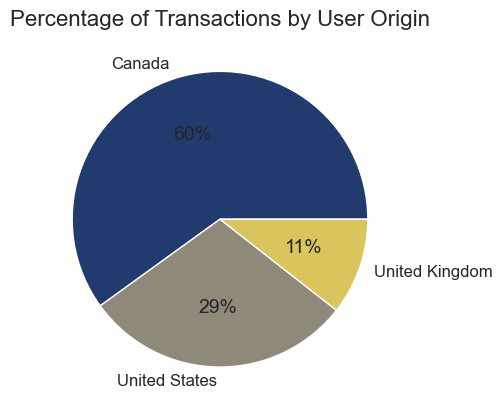

In [18]:
# pieplot
df['user_country'].value_counts(normalize=True).plot(
    kind='pie',
    wedgeprops = {'linewidth': 1, 'edgecolor': 'white'},
    autopct='%.0f%%')

plt.title('Percentage of Transactions by User Origin')
plt.ylabel(None)
plt.show()

Users from Canada are the most active, contributing to 60% of all transactions. This could be due to a higher number of users from Canada or greater engagement among Canadian users. To understand this dynamic, we should analyze the user base composition and activity levels. If Canadian users are more engaged, it would be beneficial to investigate the strategies or factors driving their activity and replicate these approaches to increase engagement among users from other origins.

**Percentage of users by origin**<br>
To check if we have more transactions from users with canadian origin let's check how many users with different origin we have (this plot technically is visualisation of two categorical variables - user origin and user id).

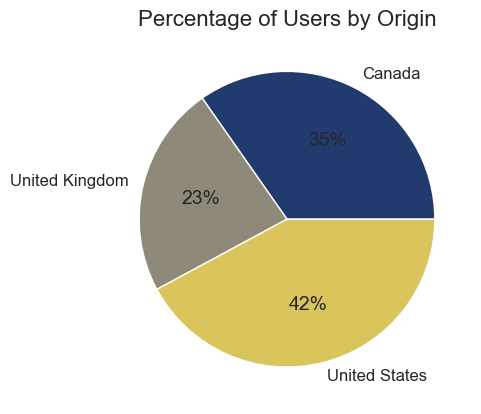

In [19]:
# pieplot 
df.groupby('user_country')['user_id'].nunique().plot(
    kind='pie',
    wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
    , autopct='%.0f%%'
    )

plt.title('Percentage of Users by Origin')
plt.ylabel(None)
plt.show()

The majority of users are from the United States. This confirms the earlier observation that Canadian users are more active, as their smaller user base generates a higher proportion of transactions. Understanding what drives this increased activity among Canadian users could provide valuable insights into user engagement strategies that may be applicable to other countries.

### Exercise 4. Categorical and numeric variables.

**Distribution of Sales by User Origin**<br>
Canadian users are more active, let's see if they also have higher amount of transactions.

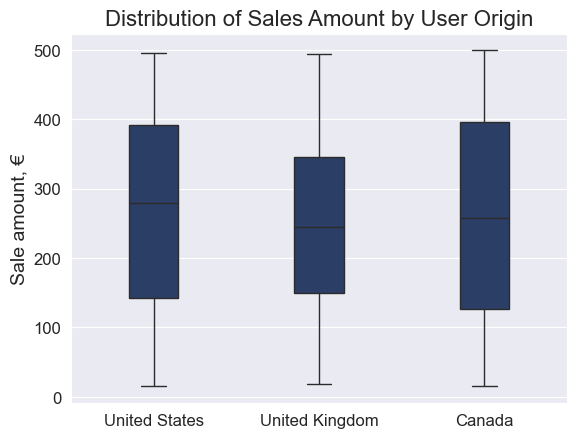

In [20]:
# boxplot
sns.boxplot(data=df.query('declined==0'), 
            x='user_country', 
            y='amount',
            width=0.3)

plt.title('Distribution of Sales Amount by User Origin')
plt.ylabel('Sale amount, €')
plt.xlabel(None)
plt.show()

While Canadian users are more active in terms of the number of transactions, the amount spent per transaction does not differ significantly across users of different origins. This suggests that higher engagement among Canadian users may be driving their larger contribution to sales volume. Further investigation is needed to determine if marketing strategies, product availability, or other factors are more effective for Canadian users. Applying these successful strategies to other regions could help improve sales globally.

### Exercise 5. Two categorical variables.

**Transactions by Company Country and User Origin**<br>
Let's see users with wich origin perform transactions in different countries.

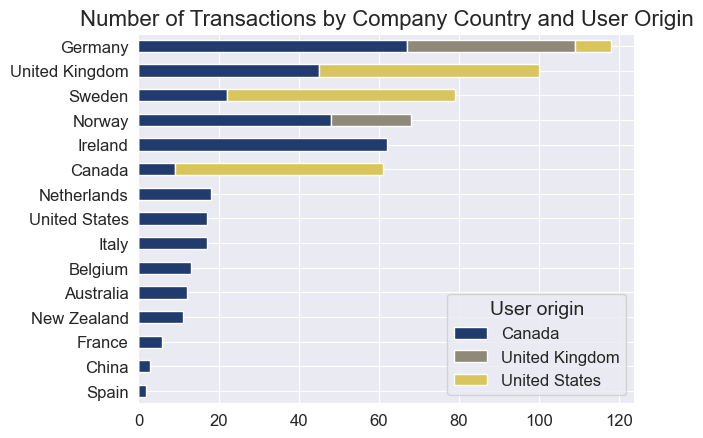

In [21]:
# pivot table
pivot = (pd.pivot_table(df, index='company_country', columns='user_country', 
                        values='id', aggfunc='count', margins=True)
            .drop('All')
            .sort_values('All')
            .drop('All', axis=1)
        )

# stacked bar chart
pivot.plot(stacked=True, kind='barh')

plt.title('Number of Transactions by Company Country and User Origin')
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title='User origin')
plt.show()

Countries with higher sales volumes tend to have more diverse buyer origins. For example, Germany, the top-performing country in terms of sales, attracts users from the USA, Canada, and the UK. Conversely, countries with fewer transactions (fewer than 20) predominantly have buyers from Canada, the most active user group overall, responsible for about 60% of purchases.<br>
Interestingly, most Canadian transactions involve users from the USA, and all transactions in the USA involve Canadian buyers. Are we targeting travelers or immigrants? We can assume that we're targeting travelers - Canadian users buy in every country where we operate.<br>
"Canadian Phenomenon" may stem from the fact that our founder is Canadian and has connections with Canadian travel agencies, which appear to promote the company’s products alongside travel packages. Expanding collaborations with travel agencies in other countries could replicate this success and boost sales internationally.

### Exercise 6. Three variables

**Transaction Amount, User Age, and Declined Status**

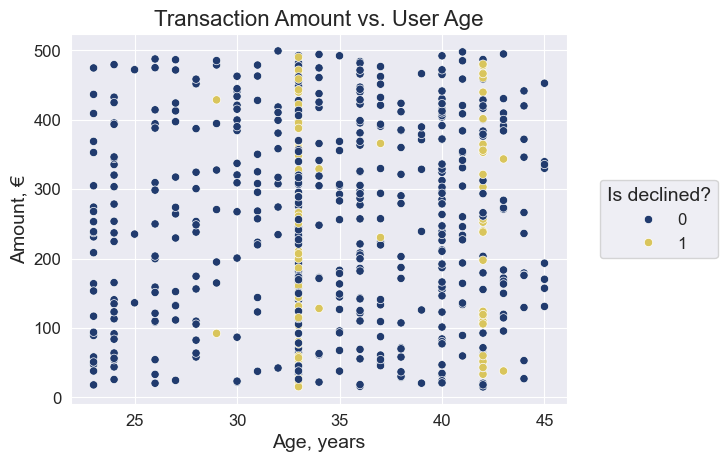

In [22]:
# scatterplot
sns.scatterplot(data=df, 
                x='user_age', 
                y='amount',
                hue='declined',
                palette=[sns.color_palette('cividis')[0], sns.color_palette('cividis')[5]])

plt.title('Transaction Amount vs. User Age')
plt.xlabel('Age, years')
plt.ylabel('Amount, €')
plt.legend(title='Is declined?', bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

The scatterplot shows no significant correlation between user age and transaction amount. However, several observations stand out:
- 33, 40, and 42 years old users show higher transaction amounts compared to other ages. This could indicate: 1) a higher number of users of these ages, which seems unusual and warrants further investigation; 2) specific users in these ages making repeated purchases.
- among these high-activity users, those aged 33 and 42 have a notable proportion of declined transactions. It is essential to determine if these declines are initial issues that were later resolved successfully or resulting from technical problems or other factors unrelated to user behavior. If the declines are linked to technical issues, addressing them promptly could improve the user experience. If they are related to user activity (e.g., frequent transactions leading to higher decline rates), targeted interventions or personalized support for these users could mitigate the issue.

Verifying the distribution of user ages in the database could help refine marketing strategies to focus on underrepresented but potentially lucrative demographics.

### Exercise 7. Pairplot.

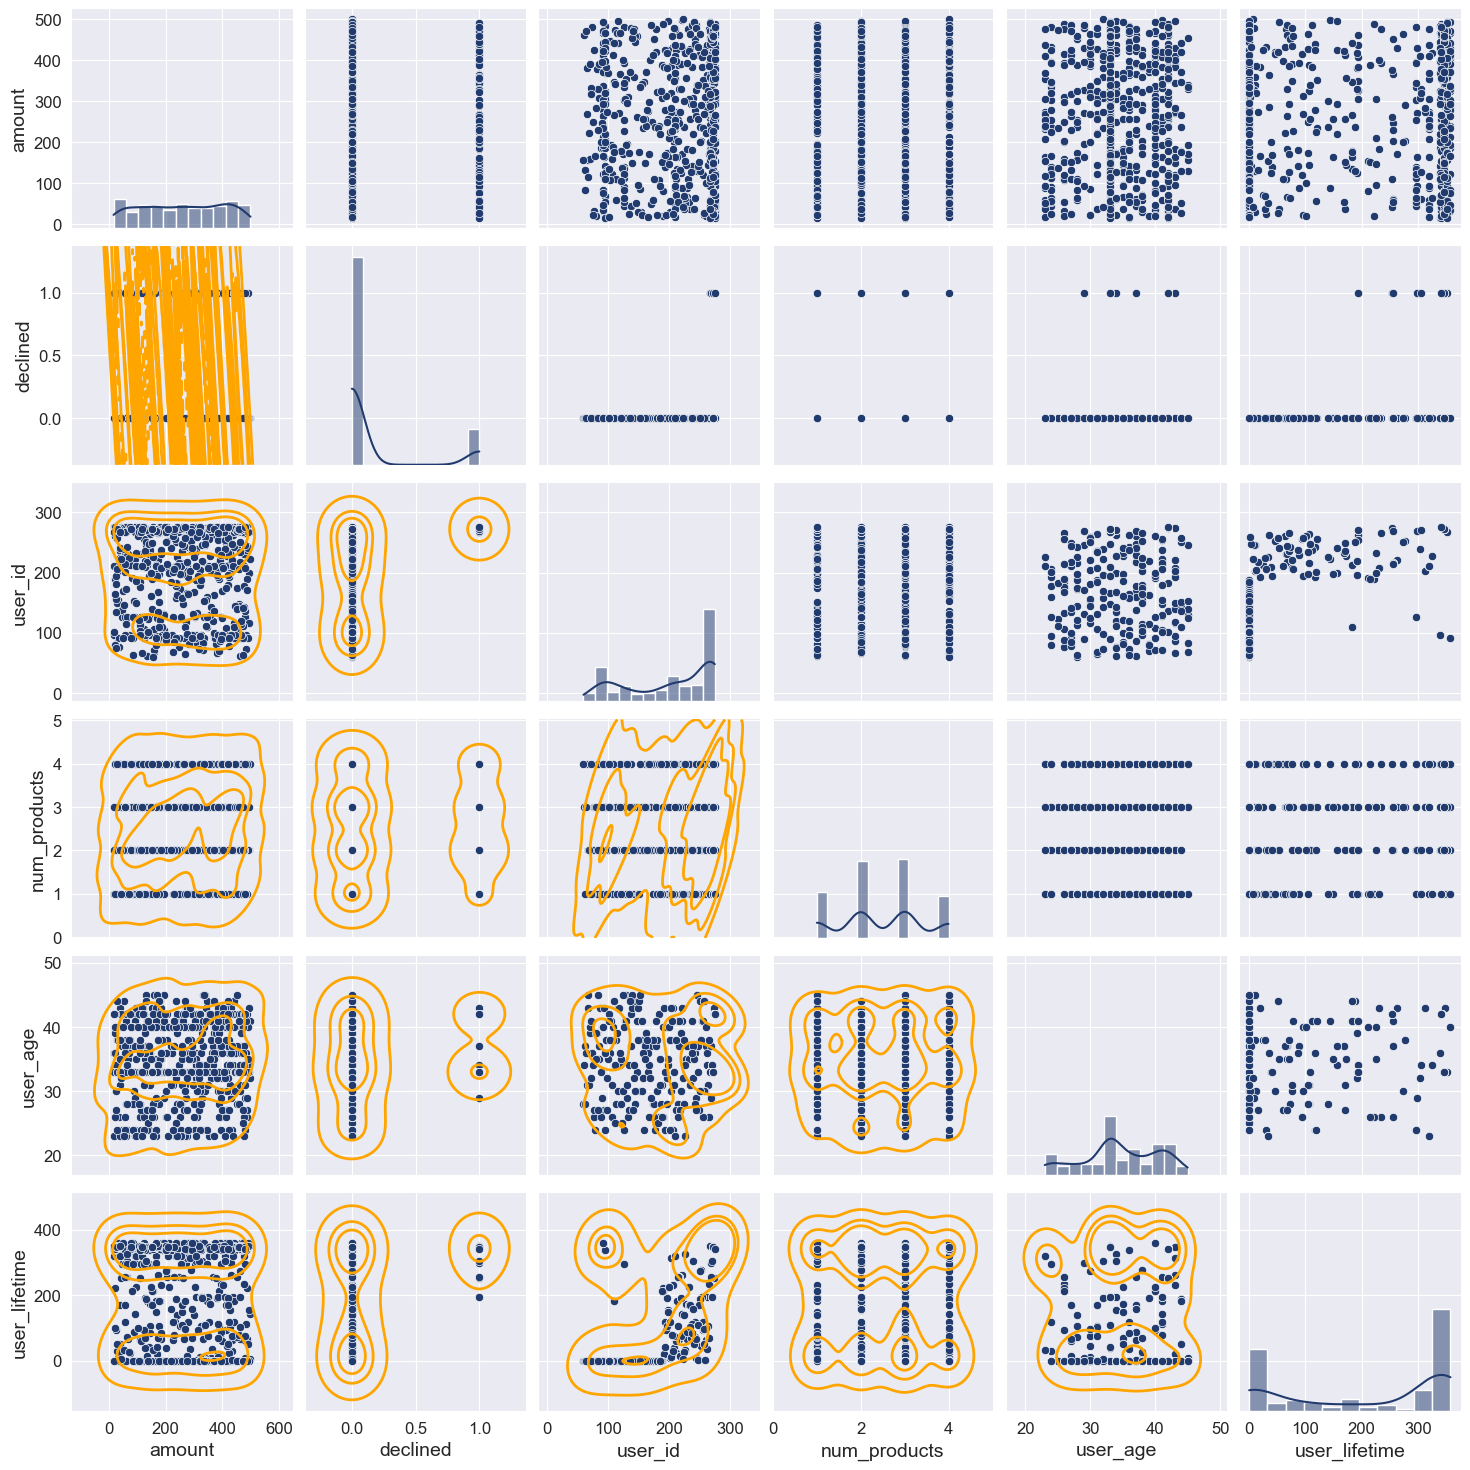

In [23]:
# scatterplots and distribution histograms with kde
g = sns.pairplot(df, 
                 vars=['amount', 'declined', 'user_id', 'num_products', 
                       'user_age', 'user_lifetime'],
                 #corner=True,
                 diag_kind='hist',
                 diag_kws={'kde': True}
                )

g.map_lower(sns.kdeplot, levels=4, color="orange", linewidths=2)

plt.show()

There is no clear relationship between transaction amounts and other variables like user age, number of products, or user lifetime. This suggests that transaction amounts are distributed independently across different user and product characteristics.<br>
Declined transactions are primarily associated with a specific subset of users. These users tend to have higher lifetime durations (over 200 days) and more than one purchase  (evidenced by liftime more than 1). This pattern indicates that issues leading to transaction declines may disproportionately affect long-standing, active users. These cases should be investigated to understand if declines are due to technical issues, and to address potential dissatisfaction among these loyal customers.

While user_id is treated as a numeric variable in this visualization, it is technically a categorical variable, as it represents distinct entities (users). This approach may obscure patterns that are better analyzed by aggregating metrics (e.g., average amount or number of declines per user). 
Variables like user_id, user_age, and user_lifetime are inherently repeated due to multiple transactions by the same user. This repetition emphasizes the importance of segmenting the analysis (e.g., by grouping or aggregating data at the user level) for more robust insights.

## Level 2
### Exercise 1. Correlation of all numerical variables.

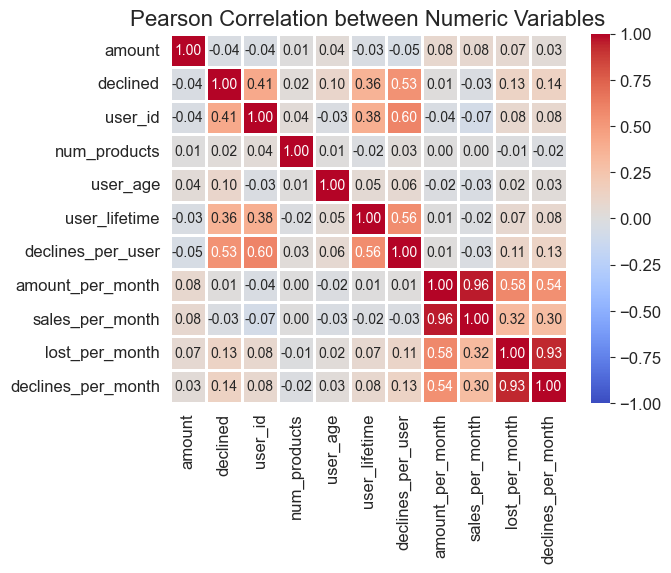

In [24]:
# heatmap of pearson correlation coefficients between numeric variables
sns.heatmap(df.corr(numeric_only=True), 
            annot=True, fmt='.2f', annot_kws={'size': 10},
            linewidths=1, cmap='coolwarm', vmax=1, vmin=-1)

plt.title("Pearson Correlation between Numeric Variables")
plt.show()

*While the Pearson correlation coefficients among the numeric variables in the dataset provides some insights, there are important limitations and nuances to consider:*
*- non-normal distributions: none of the variables are normally distributed, making Pearson correlation less appropriate for assessing relationships.*
*- nonlinear relationships: the pairplot did not reveal clear linear relationships between variables, which Pearson correlation measures exclusively.*
*- grouped variables: variables like user_age, user_lifetime, declines_per_user, amount_per_month, and declines_per_month are aggregated measures. Including them in the same correlation matrix can be misleading.*

Decline status (`declined`) has weak correlation with:
- user_id (0.41), further confirming that declined transactions are associated with specific users.
- user_lifetime (0.36), suggesting that long-term users may experience more declines, potentially due to increased activity or recurring issues.<br>
`Amount_per_month` has correlation with:
- lost_per_month (0.58) and declines_per_month (0.54). The repetition of values within these aggregated variables diminishes the interpretative value of these correlations.

Cautions:
- Pearson correlation only evaluates linear components of relationships and cannot capture more complex patterns.
- Some correlations among generated or grouped variables lack practical significance and may not yield actionable insights.

### Exercise 2. Jointplot.

**Transaction Amount vs. User Age vs. User Origin**

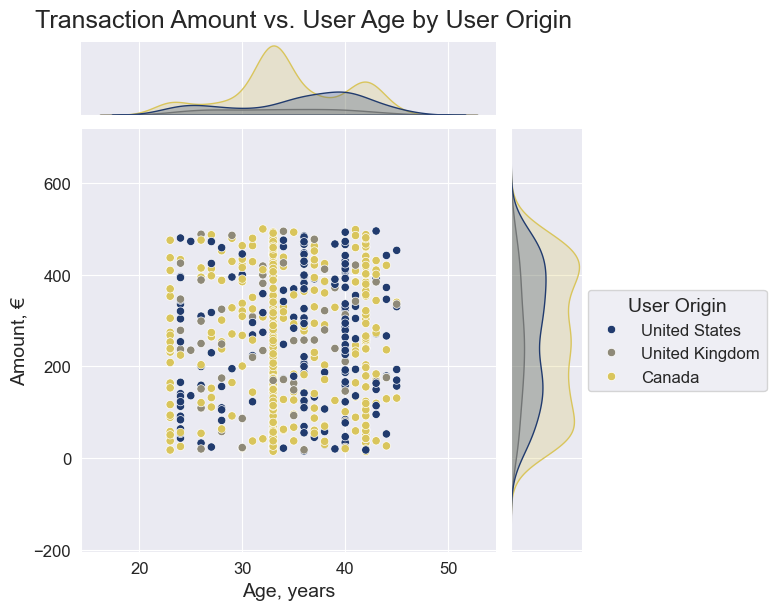

In [25]:
# transaction amount vs. user_age vs. user_country
sns.jointplot(
    data=df,
    x='user_age', 
    y='amount',
    hue='user_country',
    kind='scatter',
    palette=[sns.color_palette('cividis')[0], 
             sns.color_palette('cividis')[3],
             sns.color_palette('cividis')[5]]
)

plt.suptitle('Transaction Amount vs. User Age by User Origin', y=1.02)
plt.xlabel('Age, years')
plt.ylabel('Amount, €')
plt.legend(title='User Origin', bbox_to_anchor=(1.2, 0.5), loc='center left')
plt.show()

Younger customers (under 30) make fewer transactions regardless of origin, likely due to less familiarity with Star Wars or Game of Thrones. Transaction amounts are not age-dependent, but expanding product offerings (product diversification) to appeal to younger demographics and leveraging targeted marketing campaigns (promotions on social media) could help engage this audience and boost sales.

## Level 3
### Exercise 1. Violinplot combined with another type of graph.

**Transaction amount vs. User Origin**

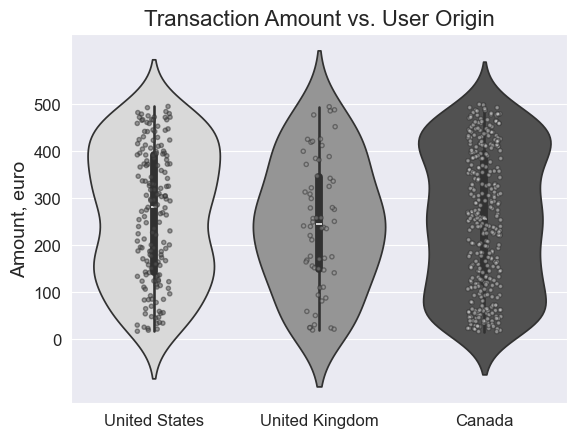

In [26]:
# transaction amount vs. user_country
sns.violinplot(data=df, y='amount', x='user_country', hue='user_country'
               , palette="Greys"
              )
sns.stripplot(data=df, y='amount', x='user_country', hue='user_country'
              , palette="Greys_r"
              , alpha=0.5
              , size=3, edgecolor='auto', linewidth=1)

plt.title('Transaction Amount vs. User Origin')
plt.ylabel('Amount, euro')
plt.xlabel(None)
plt.yticks(range(0, 600, 100))
plt.show()

The violin and strip plots futher confirm that transaction patterns are in general similar across user origins, with a significant proportion of low-value transactions. This suggests a need to review product pricing to elevate the median transaction value. Marketing strategies could focus on upselling higher-priced items, such as exclusive figures missing from a user's collection, to encourage larger purchases during transactions.

### Exercise 2. FacetGrid.

**Transaction Amount, User Age, and Declined Status by User Origin and Number of Products**

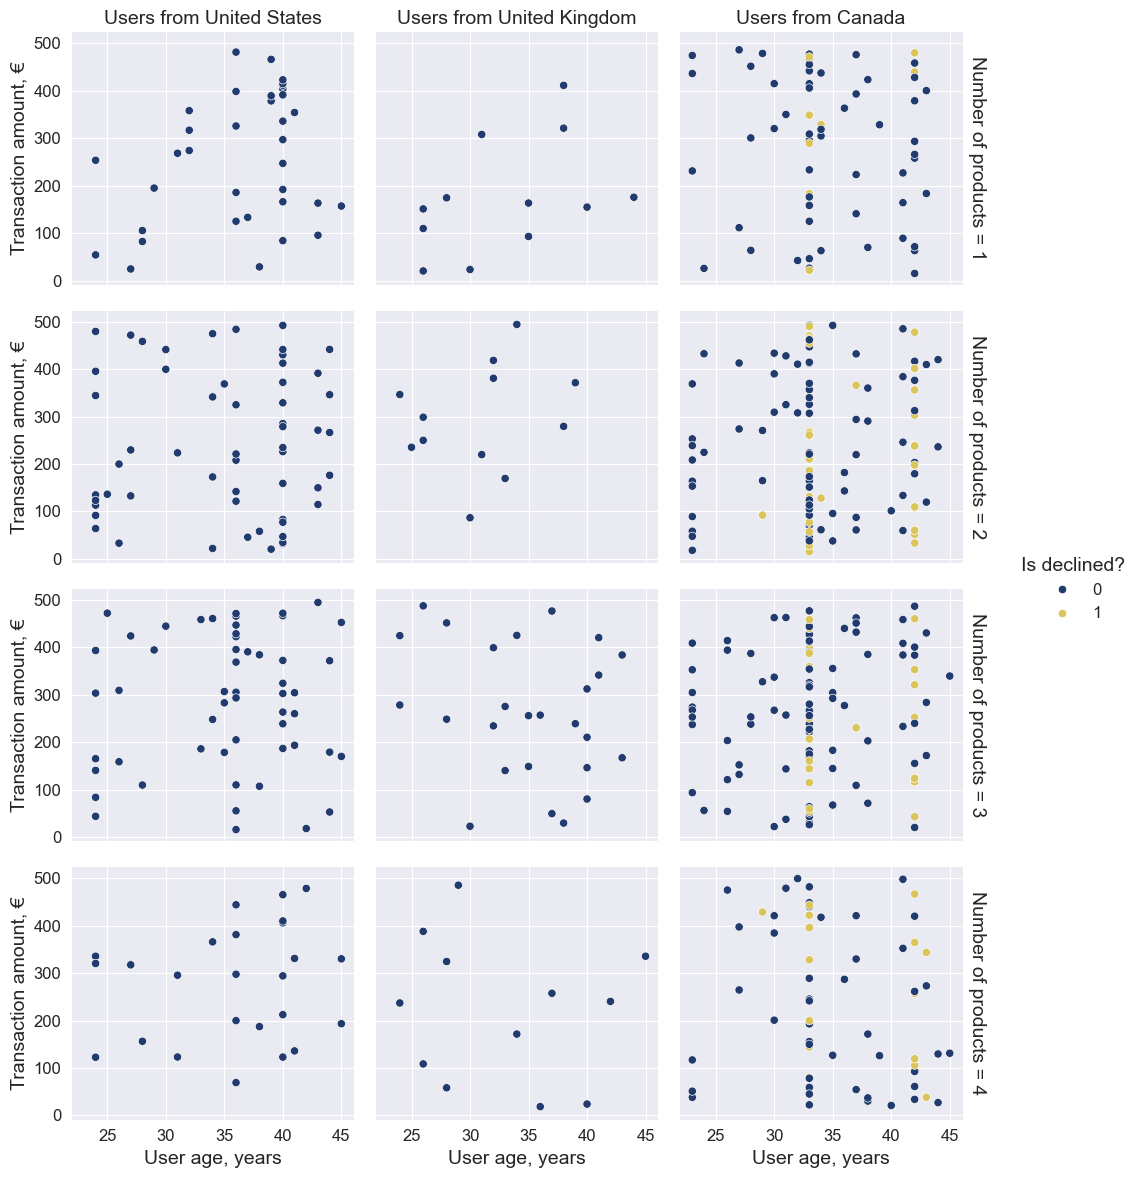

In [27]:
# FacetGrid
g = sns.FacetGrid(df, col='user_country', row='num_products', margin_titles=True, legend_out=True)
g.map_dataframe(sns.scatterplot, x='user_age', 
                y='amount', hue='declined',
                palette=[sns.color_palette('cividis')[0], sns.color_palette('cividis')[5]])

g.add_legend(title='Is declined?', bbox_to_anchor=(1, 0.5), loc='center left')
g.set_axis_labels("User age, years", "Transaction amount, €")
g.set_titles(col_template="Users from {col_name}", row_template="Number of products = {row_name}")
plt.tight_layout()
plt.show()

Declined transactions occur exclusively among Canadian users, highlighting a potential issue specific to this group that warrants further investigation. While fewer users purchase 4 products in a single transaction, promoting bulk purchases with discounts may not significantly increase the median transaction amount, as no clear relationship exists between the number of products and transaction value. Additionally, there is no distinct age pattern across user origins, and transactions of various amounts are made by users of different ages. However, younger users (under 30) seem less active overall, suggesting that marketing strategies could target this demographic to boost engagement and sales.